# 数据科学第四章
----------------------------------
## 1.Python绘图基础

In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

#### （1）快速绘图

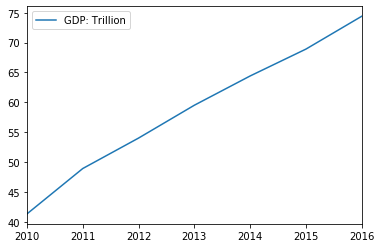

In [2]:
gdp = [41.3, 48.9, 54.0, 59.5, 64.4, 68.9, 74.4]
data = DataFrame({'GDP: Trillion': gdp}, index=['2010', '2011', '2012', '2013', '2014', '2015', '2016'])
data.plot()
plt.show()           # 显示图形

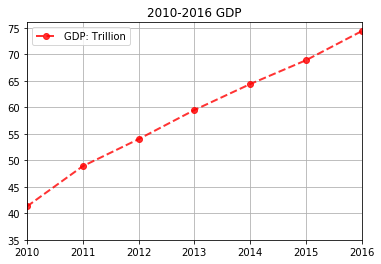

In [3]:
data.plot(title='2010-2016 GDP', LineWidth=2, marker='o', linestyle='dashed', color='r',\
          grid=True, alpha=0.8, use_index=True, yticks=[35, 40, 45, 50, 55, 60, 65 ,70, 75])
plt.show()

| 参数名 | 说明 |
|--------|------|
| x | x轴数据， 默认值为None |
| y | y轴数据， 默认值为None |
| kind | 绘图类型。'line'：折线图， 默认值；'bar'：垂直柱状图；'barth'：水平柱状图；'hist'：直方图；'box'：箱式图；'kde'/'density'：Kernel核密度估计图；'pie'：饼图；'scatter'：散点图 |
| title | 图形标题，字符串 |
| color | 画笔颜色。用颜色缩写，如'r', 'b'，或者RGB值，如'#CECECE'。主要颜色缩写：'b'：blue；'c'：cyan；'g'：green；'k'：black |
| grid | 图形是否有网格，默认为None |
| fontsize | 坐标轴（包括x轴和y轴）刻度的字体大小。整数，默认为None |
| alpha | 透明度0~1 |
| use_index | 默认为True，用索引作为x轴刻度 |
| linewidth | 绘图线宽 |
| linestyle | 绘图线形 |
| marker | 标记风格，即点型 |
| xlim、ylim | x轴,y轴的范围，二元组表示最小值和最大值 |
| ax | axes对象 |

#### （2）精细画图

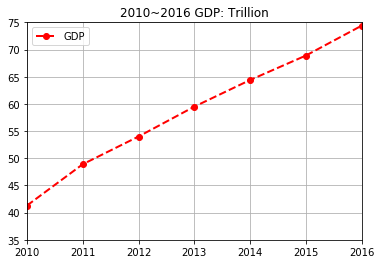

In [4]:
plt.figure()       # 创建绘图对象
GDPdata = [41.3, 48.9, 54.0, 59.5, 64.4, 68.9, 74.4]
plt.plot(GDPdata, color='r', linewidth=2, linestyle='dashed', marker='o', label='GDP')    # 绘图

# 精细设置图元
plt.title('2010~2016 GDP: Trillion')
plt.xlim(0, 6)     # x轴绘图范围
plt.ylim(35, 75)   # y轴绘图范围
plt.xticks(range(0, 7), ('2010', '2011', '2012', '2013', '2014', '2015', '2016'))    # 将x轴刻度映射为字符串
plt.legend(loc='upper left')      # 图例说明位置
plt.grid()         # 显示网格线
plt.show()         # 显示并关闭绘图

#### （3）多子图
* figure.add_subplot(numRows, numCols, plotNum)
> - numRows: 绘图区域划分行数
> - numCols: 绘图区域划分列数
> - plotNum: 绘图区域所在区域

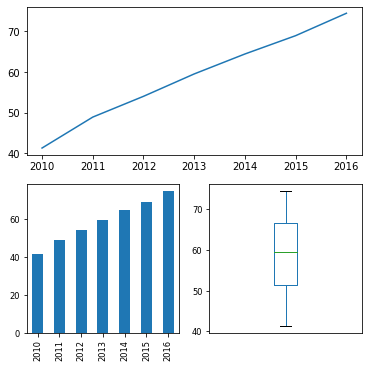

In [5]:
data = Series(GDPdata, index=['2010', '2011', '2012', '2013', '2014', '2015', '2016'])
fig = plt.figure(figsize=(6, 6))      # 定义图形大小

ax1 = fig.add_subplot(2, 1, 1)        # 创建子图1
ax1.plot(data)                        # 用AxesSubplot绘制折线图

ax2 = fig.add_subplot(2, 2, 3)        # 创建子图2
data.plot(kind='bar', use_index=True, fontsize='small', ax=ax2)

ax3 = fig.add_subplot(2, 2, 4)        # 创建子图3
data.plot(kind='box', xticks=[], fontsize='small', ax=ax3)

#### （4）设置图元属性和说明，保存操作

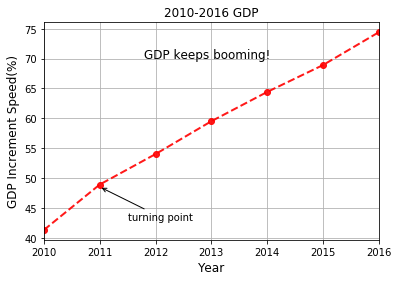

In [6]:
data.plot(title='2010-2016 GDP', LineWidth=2, marker='o', linestyle='dashed', color='r', grid=True, alpha=0.9)

# 超出范围后不显示
plt.annotate('turning point', xy=(1, 48.5), xytext=(1.5, 43), arrowprops=dict(arrowstyle='->'))

plt.text(1.8, 70, 'GDP keeps booming!', fontsize='larger')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Increment Speed(%)', fontsize=12)

# 保存
plt.savefig('3th data\GDP.png', dpi=400, bbox_inches='tight')

## 2.其他数据可视化表示方法
#### （1）函数绘图

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd

# 设置中文
import matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

###### 引入数据

In [3]:
GINI_COV = pd.read_csv('3th data\GINI_COV.csv').iloc[:, 1:]
GINI_COV

中国        泰国      印度尼西亚        越南       柬埔寨       奥地利       比利时  \
0   1.472413  0.574690  -1.138000  0.961833  0.990535  0.136190  0.030381   
1   0.574690  3.887452  -6.833905  0.524238  3.745933 -1.119286  0.528905   
2  -1.138000 -6.833905  14.122667 -1.356048 -6.489586  1.886429 -0.741238   
3   0.961833  0.524238  -1.356048  1.286024  0.095826 -0.047500  0.106048   
4   0.990535  3.745933  -6.489586  0.095826  9.228565 -0.930857  1.087014   
..       ...       ...        ...       ...       ...       ...       ...   
62  1.650081  2.907842  -6.005233  1.017324  4.353009 -0.665786 -0.105945   
63  0.367333  3.463024  -4.305619  0.105167  4.024590 -1.337857  0.729190   
64  0.460762  3.382095  -7.516762  0.893524  4.168433 -1.205714  0.243190   
65  0.765381  6.296405 -12.982667  0.997833  5.390538 -1.812143  0.501952   
66 -0.248414 -1.531205   4.659531 -0.490467  0.507772  0.369179  0.430743   

          瑞士        捷克        德国  ...       厄瓜多尔       墨西哥       巴拿马  \
0   0.068476  0.042095 -0.323381  ...   0.851048 -0.308119  0.322762   
1   1.387714  0.990286 -0.412095  ...   6.916690  3.435619  3.936405   
2  -2.683857 -1.907286  1.303905  ... -13.407095 -6.943881 -7.688381   
3  -0.028000  0.267429 -0.462810  ...   0.910262  0.341690  0.487833   
4   2.284157  0.442090  0.426067  ...   8.361343  2.486307  3.289538   
..       ...       ...       ...  ...        ...       ...       ...   
62  1.220221  0.702843 -0.544824  ...   6.064755  2.332612  3.492340   
63  1.060857  0.825429  0.308048  ...   5.653190  2.753190  3.137762   
64  1.571286  1.186000 -0.922810  ...   7.842762  4.199548  4.723905   
65  2.529571  1.915143 -1.159619  ...  12.506381  6.511738  7.451952   
66 -0.412436 -0.717974  1.246205  ...  -3.732493 -2.743832 -2.793590   

           秘鲁       玻利维亚      危地马拉      洪都拉斯       巴拉圭       萨尔瓦多        南非  
0    0.832905   0.049214  1.650081  0.367333  0.460762   0.765381 -0.248414  
1    5.758643   9.400071  2.907842  3.463024  3.382095   6.296405 -1.531205  
2  -10.532714 -18.070571 -6.005233 -4.305619 -7.516762 -12.982667  4.659531  
3    0.707929   0.389357  1.017324  0.105167  0.893524   0.997833 -0.490467  
4    7.452195  11.003314  4.353009  4.024590  4.168433   5.390538  0.507772  
..        ...        ...       ...       ...       ...        ...       ...  
62   6.009764   7.909443  5.156259  2.263938  4.513252   6.001876 -1.842574  
63   5.501714   7.913857  2.263938  6.586381  2.893381   4.284190  0.413193  
64   7.370429  11.137214  4.513252  2.893381  7.250667   7.554619 -2.830776  
65  10.684857  17.325214  6.001876  4.284190  7.554619  13.171238 -4.599483  
66  -2.007002  -4.964467 -1.842574  0.413193 -2.830776  -4.599483  3.824582  

[67 rows x 67 columns]

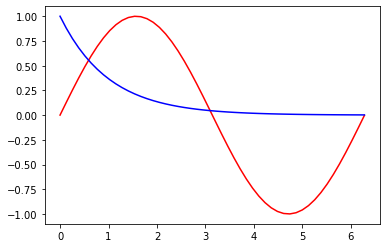

In [7]:
x = np.linspace(0, 6.28, 50)        # 在0~6.28设置50个采样点
y = np.sin(x)                       # 计算y=sin(x)数组
plt.plot(x, y, color='r')           # 绘制y=sin(x)
plt.plot(x, np.exp(-x), c='b')      # 绘制y=exp(-x)

#### （2）绘制散点图

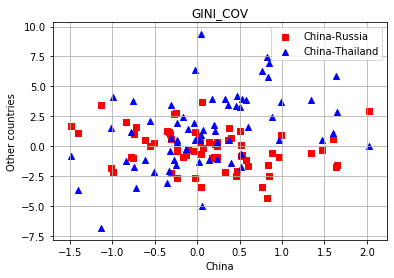

In [9]:
data1 = GINI_COV['中国']
data2 = GINI_COV['俄罗斯']
data3 = GINI_COV['泰国']

# 绘制散点图
plt.figure()
plt.scatter(data1, data2, c='r', marker='s', label='China-Russia')
plt.scatter(data1, data3, c='b', marker='^', label='China-Thailand')
plt.title('GINI_COV')
plt.xlabel('China')
plt.ylabel('Other countries')
plt.grid()
plt.legend(loc='upper right')

#### （3）绘制散点图矩阵

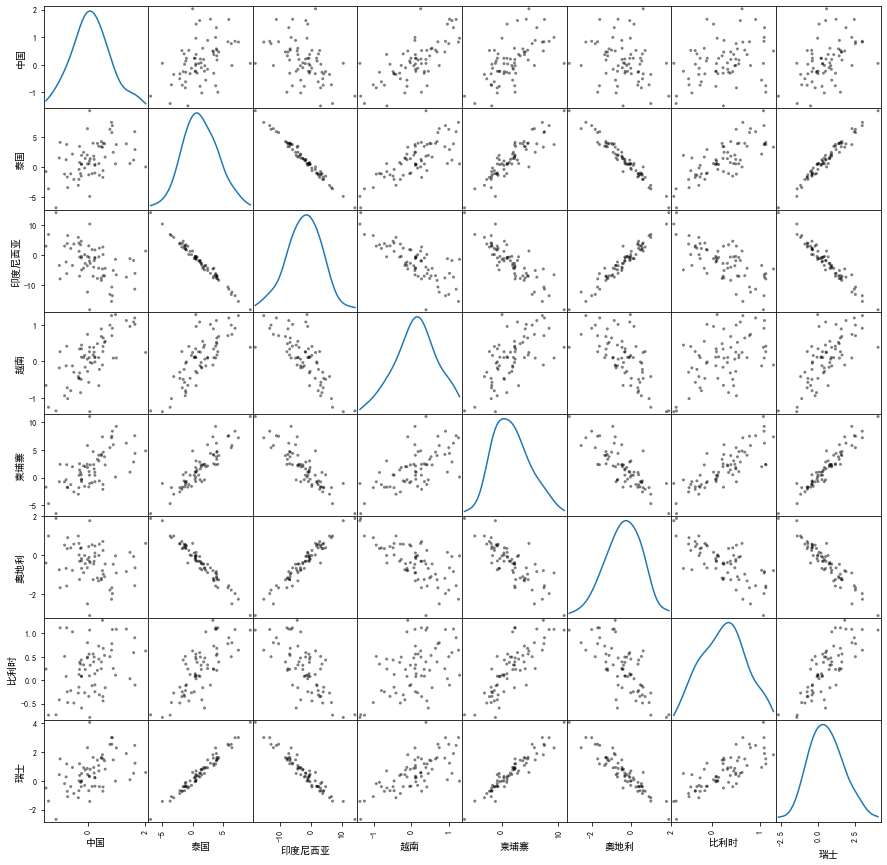

In [16]:
# 绘制散点图矩阵
grr = pd.plotting.scatter_matrix(GINI_COV.iloc[:, :8], diagonal='kde', color='k', figsize=(15,15))

#### （4）柱状图

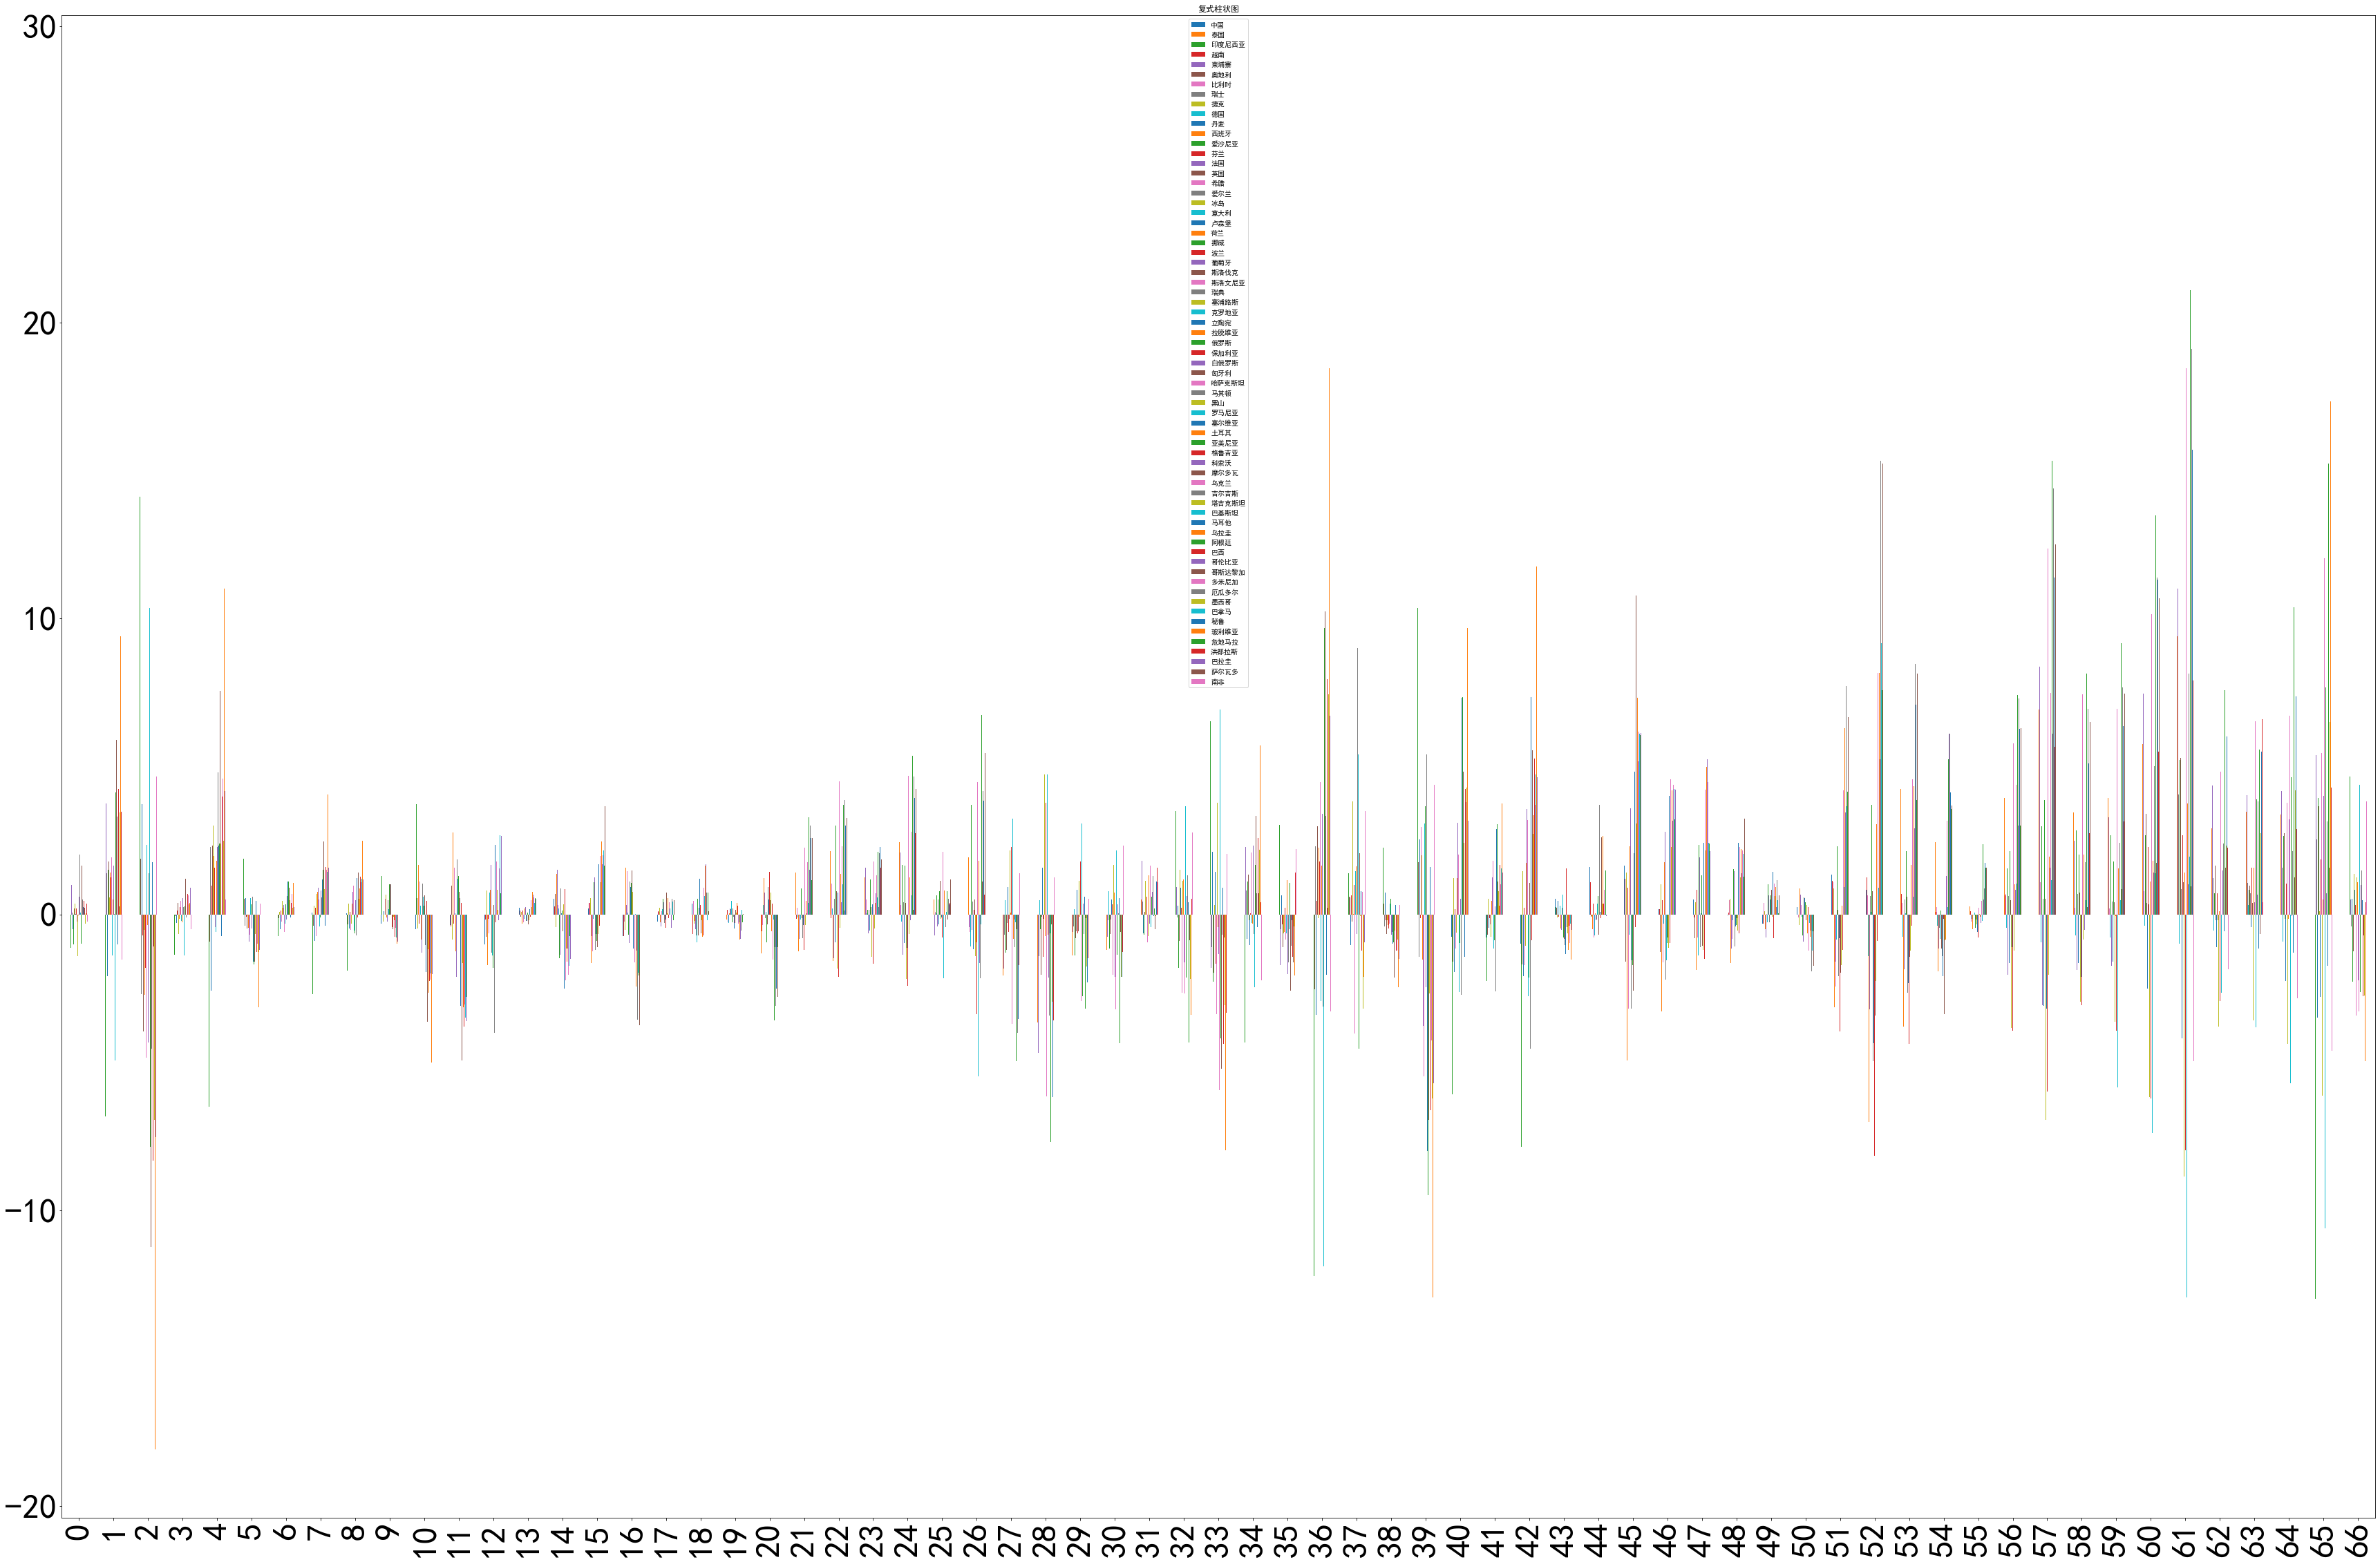

In [33]:
# 绘制复式柱状图
GINI_COV.plot(kind='bar', title='复式柱状图', figsize=(60,40), fontsize=50)

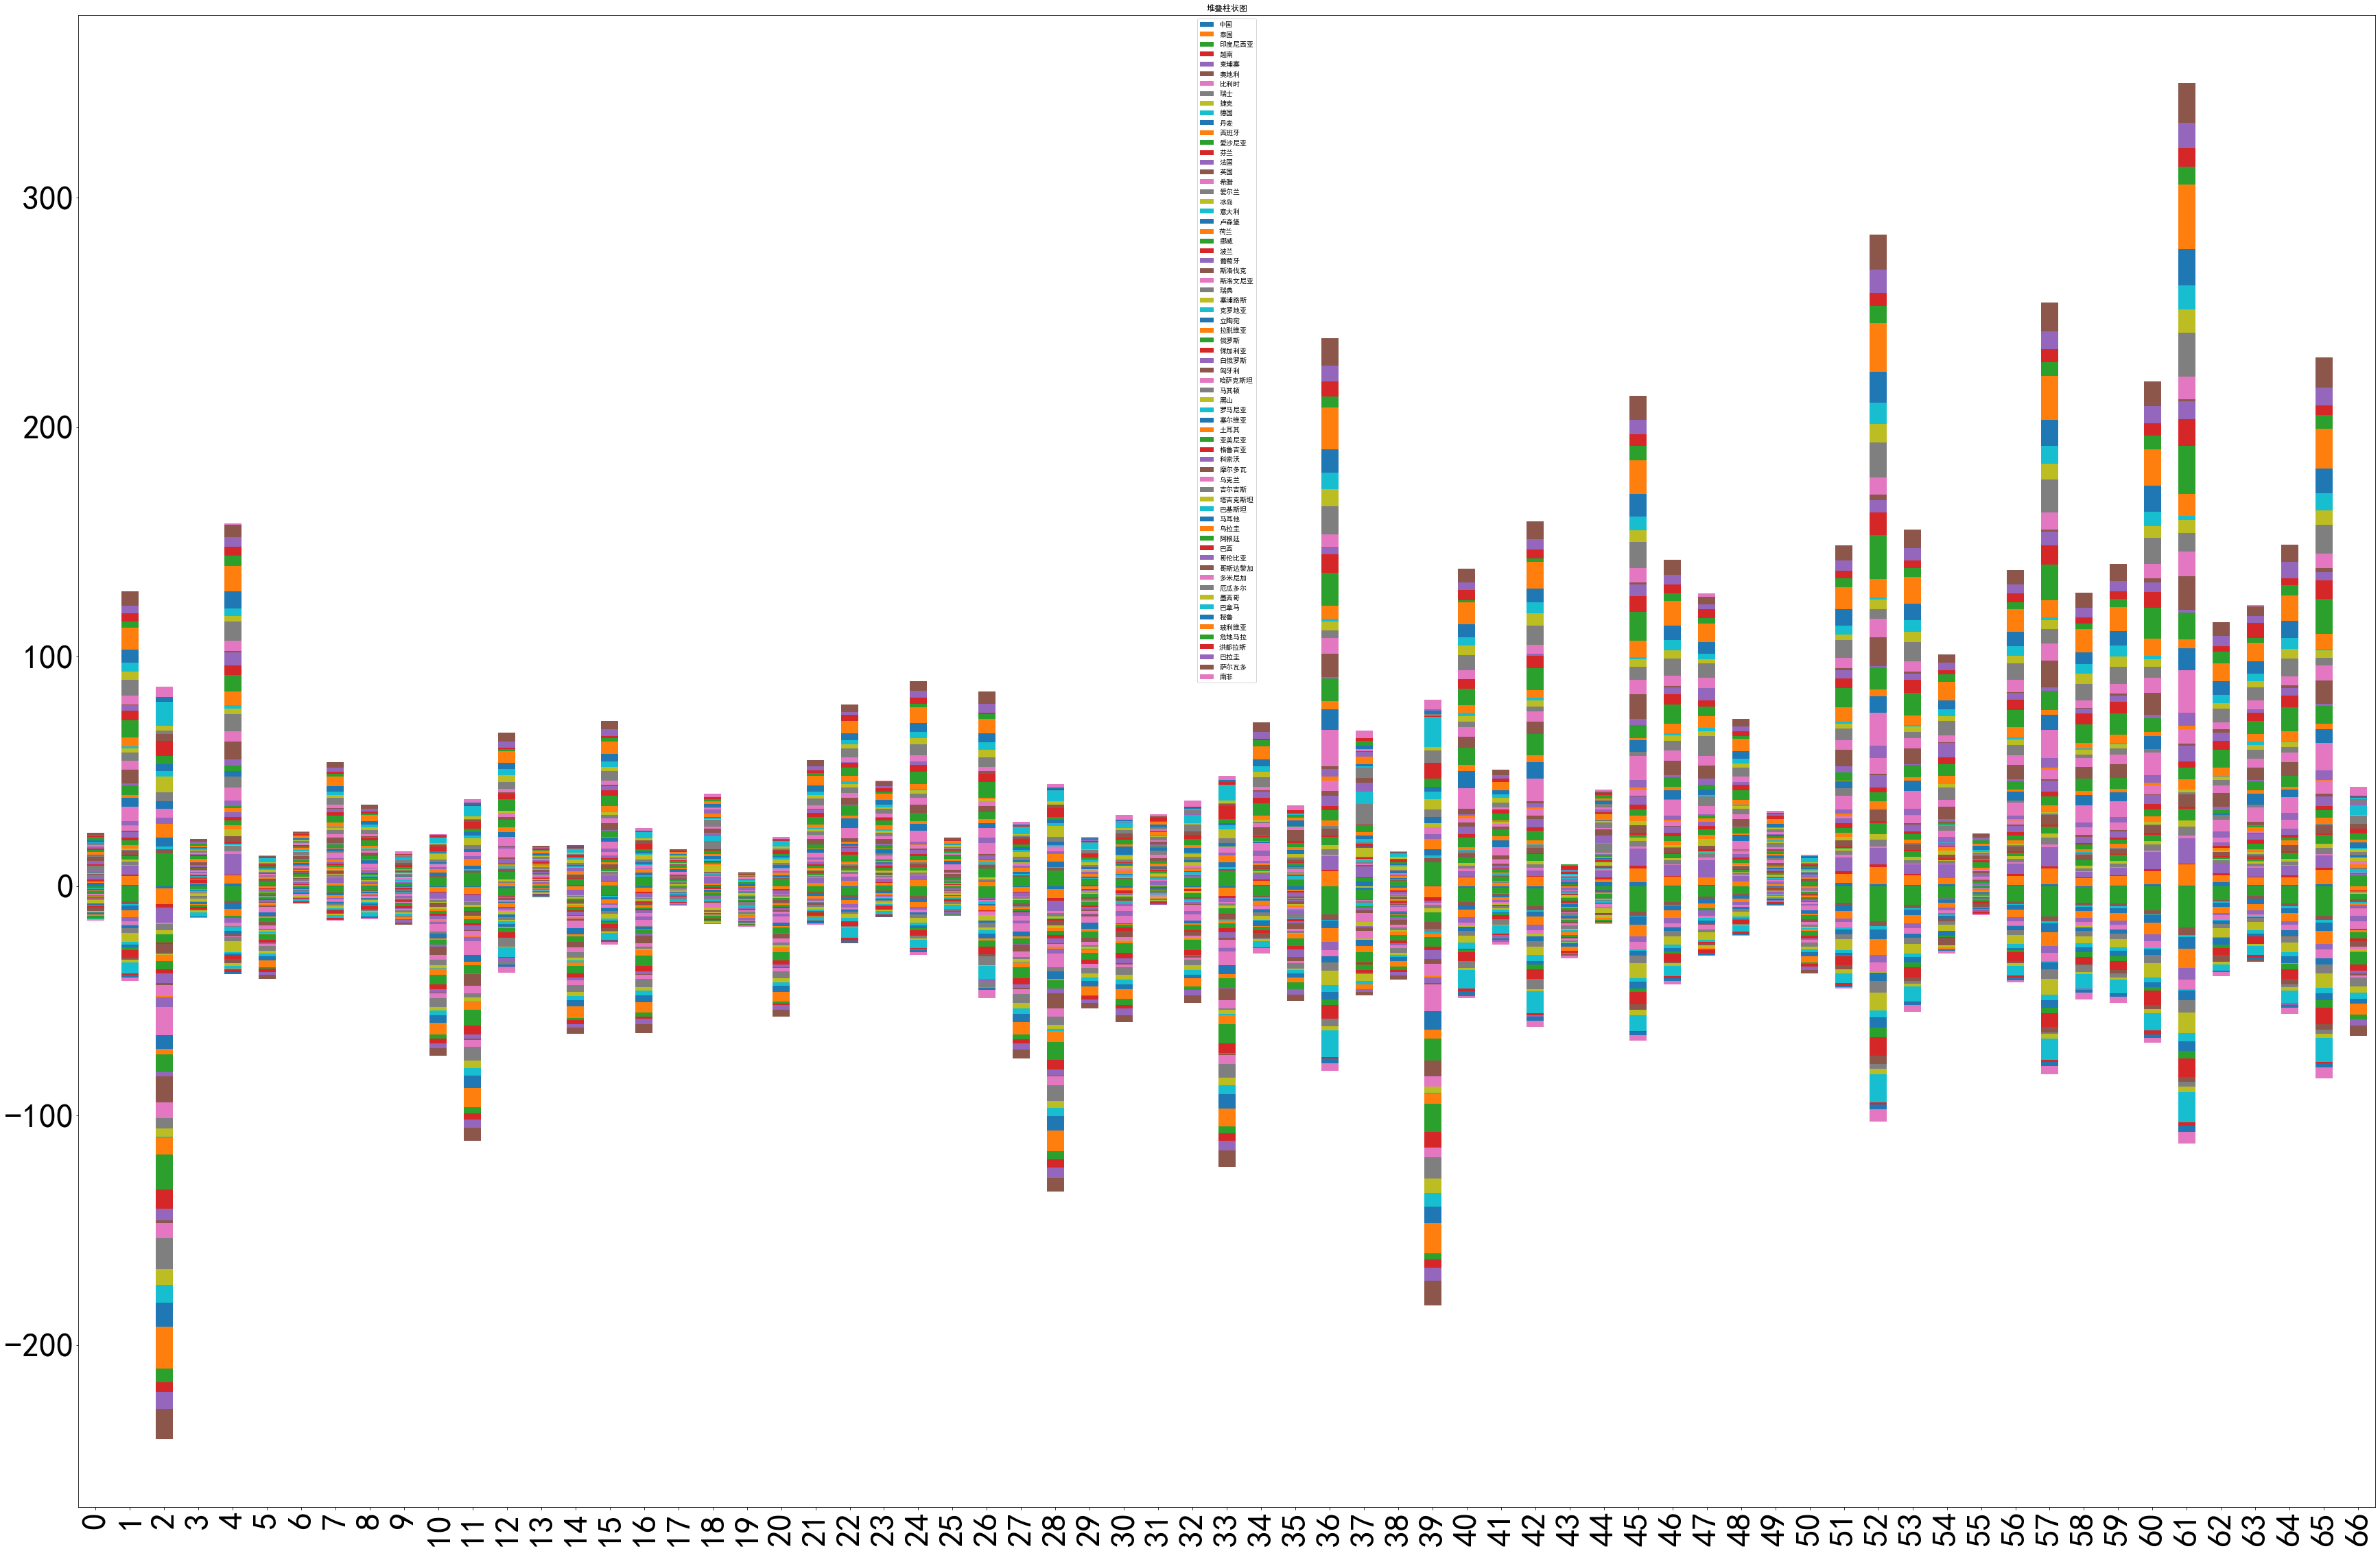

In [35]:
# 绘制堆叠柱状图
GINI_COV.plot(kind='bar', stacked=True, title='堆叠柱状图', figsize=(60,40), fontsize=50)

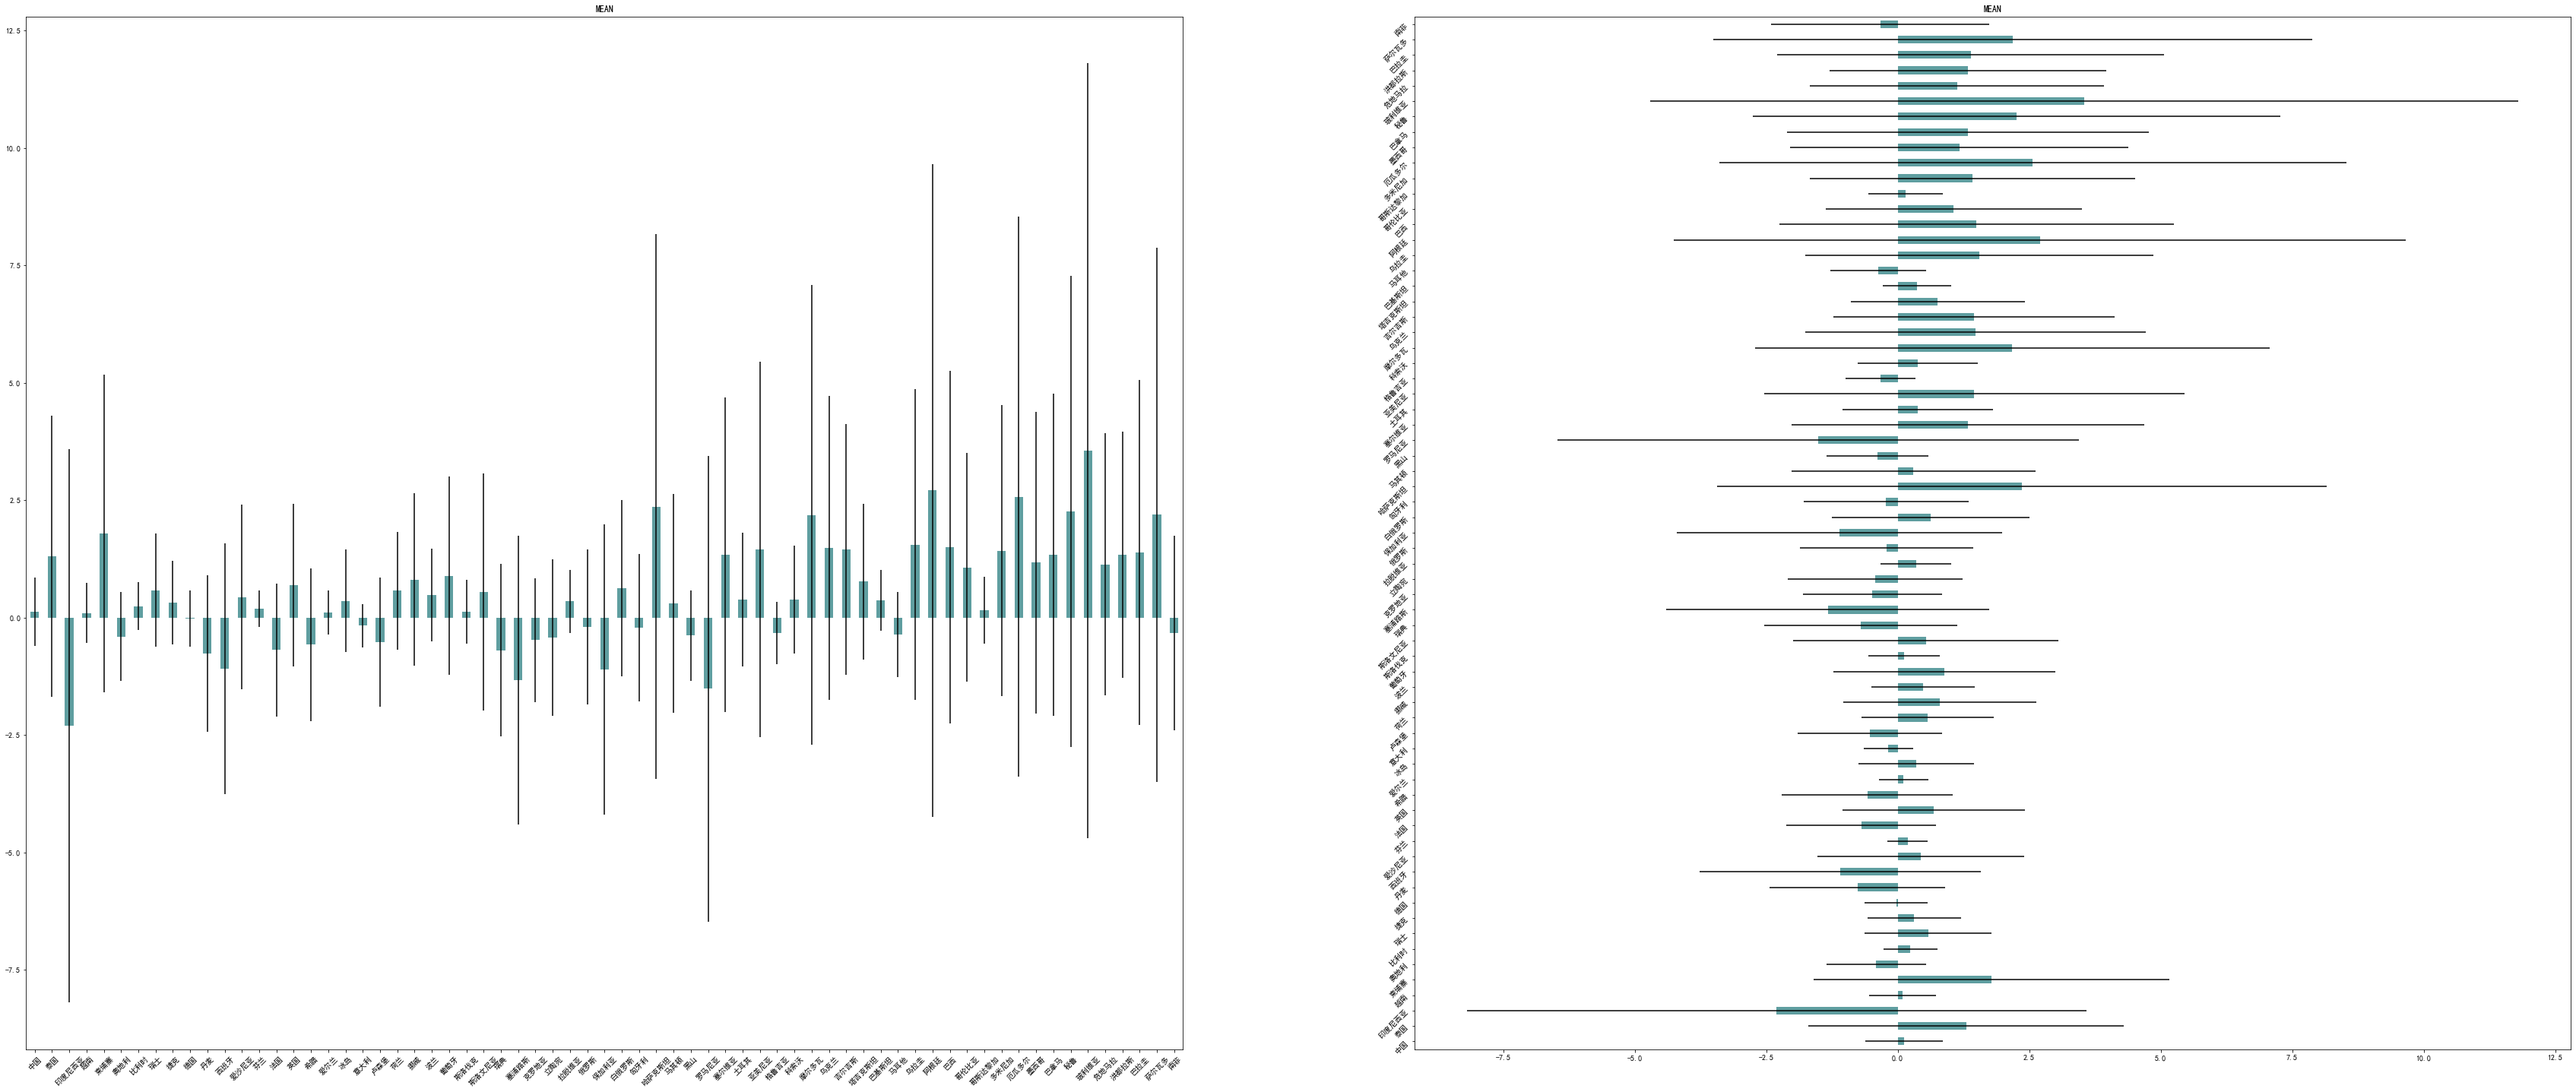

In [9]:
# 绘制均值与标准差图
mean = np.mean(GINI_COV)         # 计算均值
std = np.std(GINI_COV)           # 计算标准差
fig = plt.figure(figsize = (60, 25))
plt.subplots_adjust(wspace=0.2)  # 设置纵向间隔

# 绘制均值的垂直和水平柱状图，标准差使用误差线表示
ax1 = fig.add_subplot(1, 2, 1)
mean.plot(kind='bar', yerr=std, color='cadetblue', title='MEAN', rot=45, ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
mean.plot(kind='barh', xerr=std, color='cadetblue', title='MEAN', rot=45, ax=ax2)

#### （5）折线图

In [37]:
GINI = pd.read_csv('3th data\GINI.csv')
GINI = GINI.iloc[:, 1:].T.interpolate(method='linear').fillna(method='bfill')
GINI

0     1      2          3          4     5      6       7     8    \
2000  33.500  32.1  31.70  42.100000  38.100000  46.1  42.80  37.700  39.1   
2001  33.500  32.1  31.70  42.100000  38.100000  46.1  42.35  37.700  39.1   
2002  33.500  32.1  31.70  42.100000  38.100000  46.1  41.90  37.675  39.1   
2003  33.500  32.1  31.70  41.733333  38.483333  46.1  42.20  37.650  39.1   
2004  33.100  32.1  31.70  41.366667  38.866667  46.1  42.50  37.625  39.1   
2005  33.675  32.1  31.70  41.000000  39.250000  46.1  42.15  37.600  39.1   
2006  34.250  32.1  31.70  41.633333  39.633333  46.1  41.80  37.575  39.1   
2007  34.825  32.1  32.00  42.266667  40.016667  46.1  39.80  37.550  39.1   
2008  35.400  32.1  32.30  42.900000  40.400000  45.5  40.30  37.525  39.1   
2009  35.050  32.1  32.15  43.300000  39.660000  46.3  39.60  37.500  39.1   
2010  34.700  32.1  32.00  43.700000  38.920000  45.1  39.40  37.500  39.1   
2011  34.975  32.1  31.80  42.400000  38.180000  43.9  37.50  37.500  39.1   
2012  35.250  32.1  31.60  42.200000  37.440000  42.6  39.30  37.500  39.1   
2013  35.525  32.1  31.60  39.700000  36.700000  41.3  37.80  37.500  39.1   
2014  35.800  32.1  31.60  39.100000  36.700000  41.3  37.00  37.500  39.1   

          9    ...        148    149     150   151      152    153        154  \
2000  63.2600  ...  44.400000  48.50  40.200  46.3  39.8000  42.20  37.300000   
2001  59.0880  ...  44.400000  49.20  40.200  46.3  39.8000  42.20  37.728571   
2002  54.9160  ...  44.400000  49.90  40.200  46.3  39.8000  42.20  38.157143   
2003  50.7440  ...  44.400000  50.60  40.200  46.3  39.8000  42.20  38.585714   
2004  46.5720  ...  44.400000  51.30  39.425  46.3  40.2375  42.20  39.014286   
2005  42.4000  ...  44.400000  52.00  38.650  46.3  40.6750  42.20  39.442857   
2006  42.1125  ...  40.850000  51.04  37.875  46.3  41.1125  42.20  39.871429   
2007  41.8250  ...  37.300000  50.08  37.100  46.3  41.5500  42.96  40.300000   
2008  41.5375  ...  35.850000  49.12  36.325  46.3  41.9875  43.72  39.675000   
2009  41.2500  ...  34.400000  48.16  35.550  46.3  42.4250  44.48  39.050000   
2010  40.9625  ...  32.950000  47.20  34.775  46.3  42.8625  45.24  38.425000   
2011  40.6750  ...  31.500000  46.50  34.000  46.3  43.3000  46.00  37.800000   
2012  40.3875  ...  32.433333  45.80  34.000  46.3  43.3000  46.00  37.800000   
2013  40.1000  ...  33.366667  45.10  34.000  46.3  43.3000  46.00  37.800000   
2014  40.1000  ...  34.300000  45.10  34.000  46.3  43.3000  46.00  37.800000   

            155      156   157  
2000  45.200000  42.2000  43.2  
2001  45.200000  42.2000  43.2  
2002  45.200000  42.2000  43.2  
2003  44.433333  42.2000  43.2  
2004  43.666667  42.2000  43.2  
2005  42.900000  42.1875  43.2  
2006  43.225000  42.1750  43.2  
2007  43.550000  42.1625  43.2  
2008  43.875000  42.1500  43.2  
2009  44.200000  42.1375  43.2  
2010  43.133333  42.1250  43.2  
2011  42.066667  42.1125  43.2  
2012  41.000000  42.1000  43.2  
2013  41.000000  42.1000  43.2  
2014  41.000000  42.1000  43.2  

[15 rows x 158 columns]

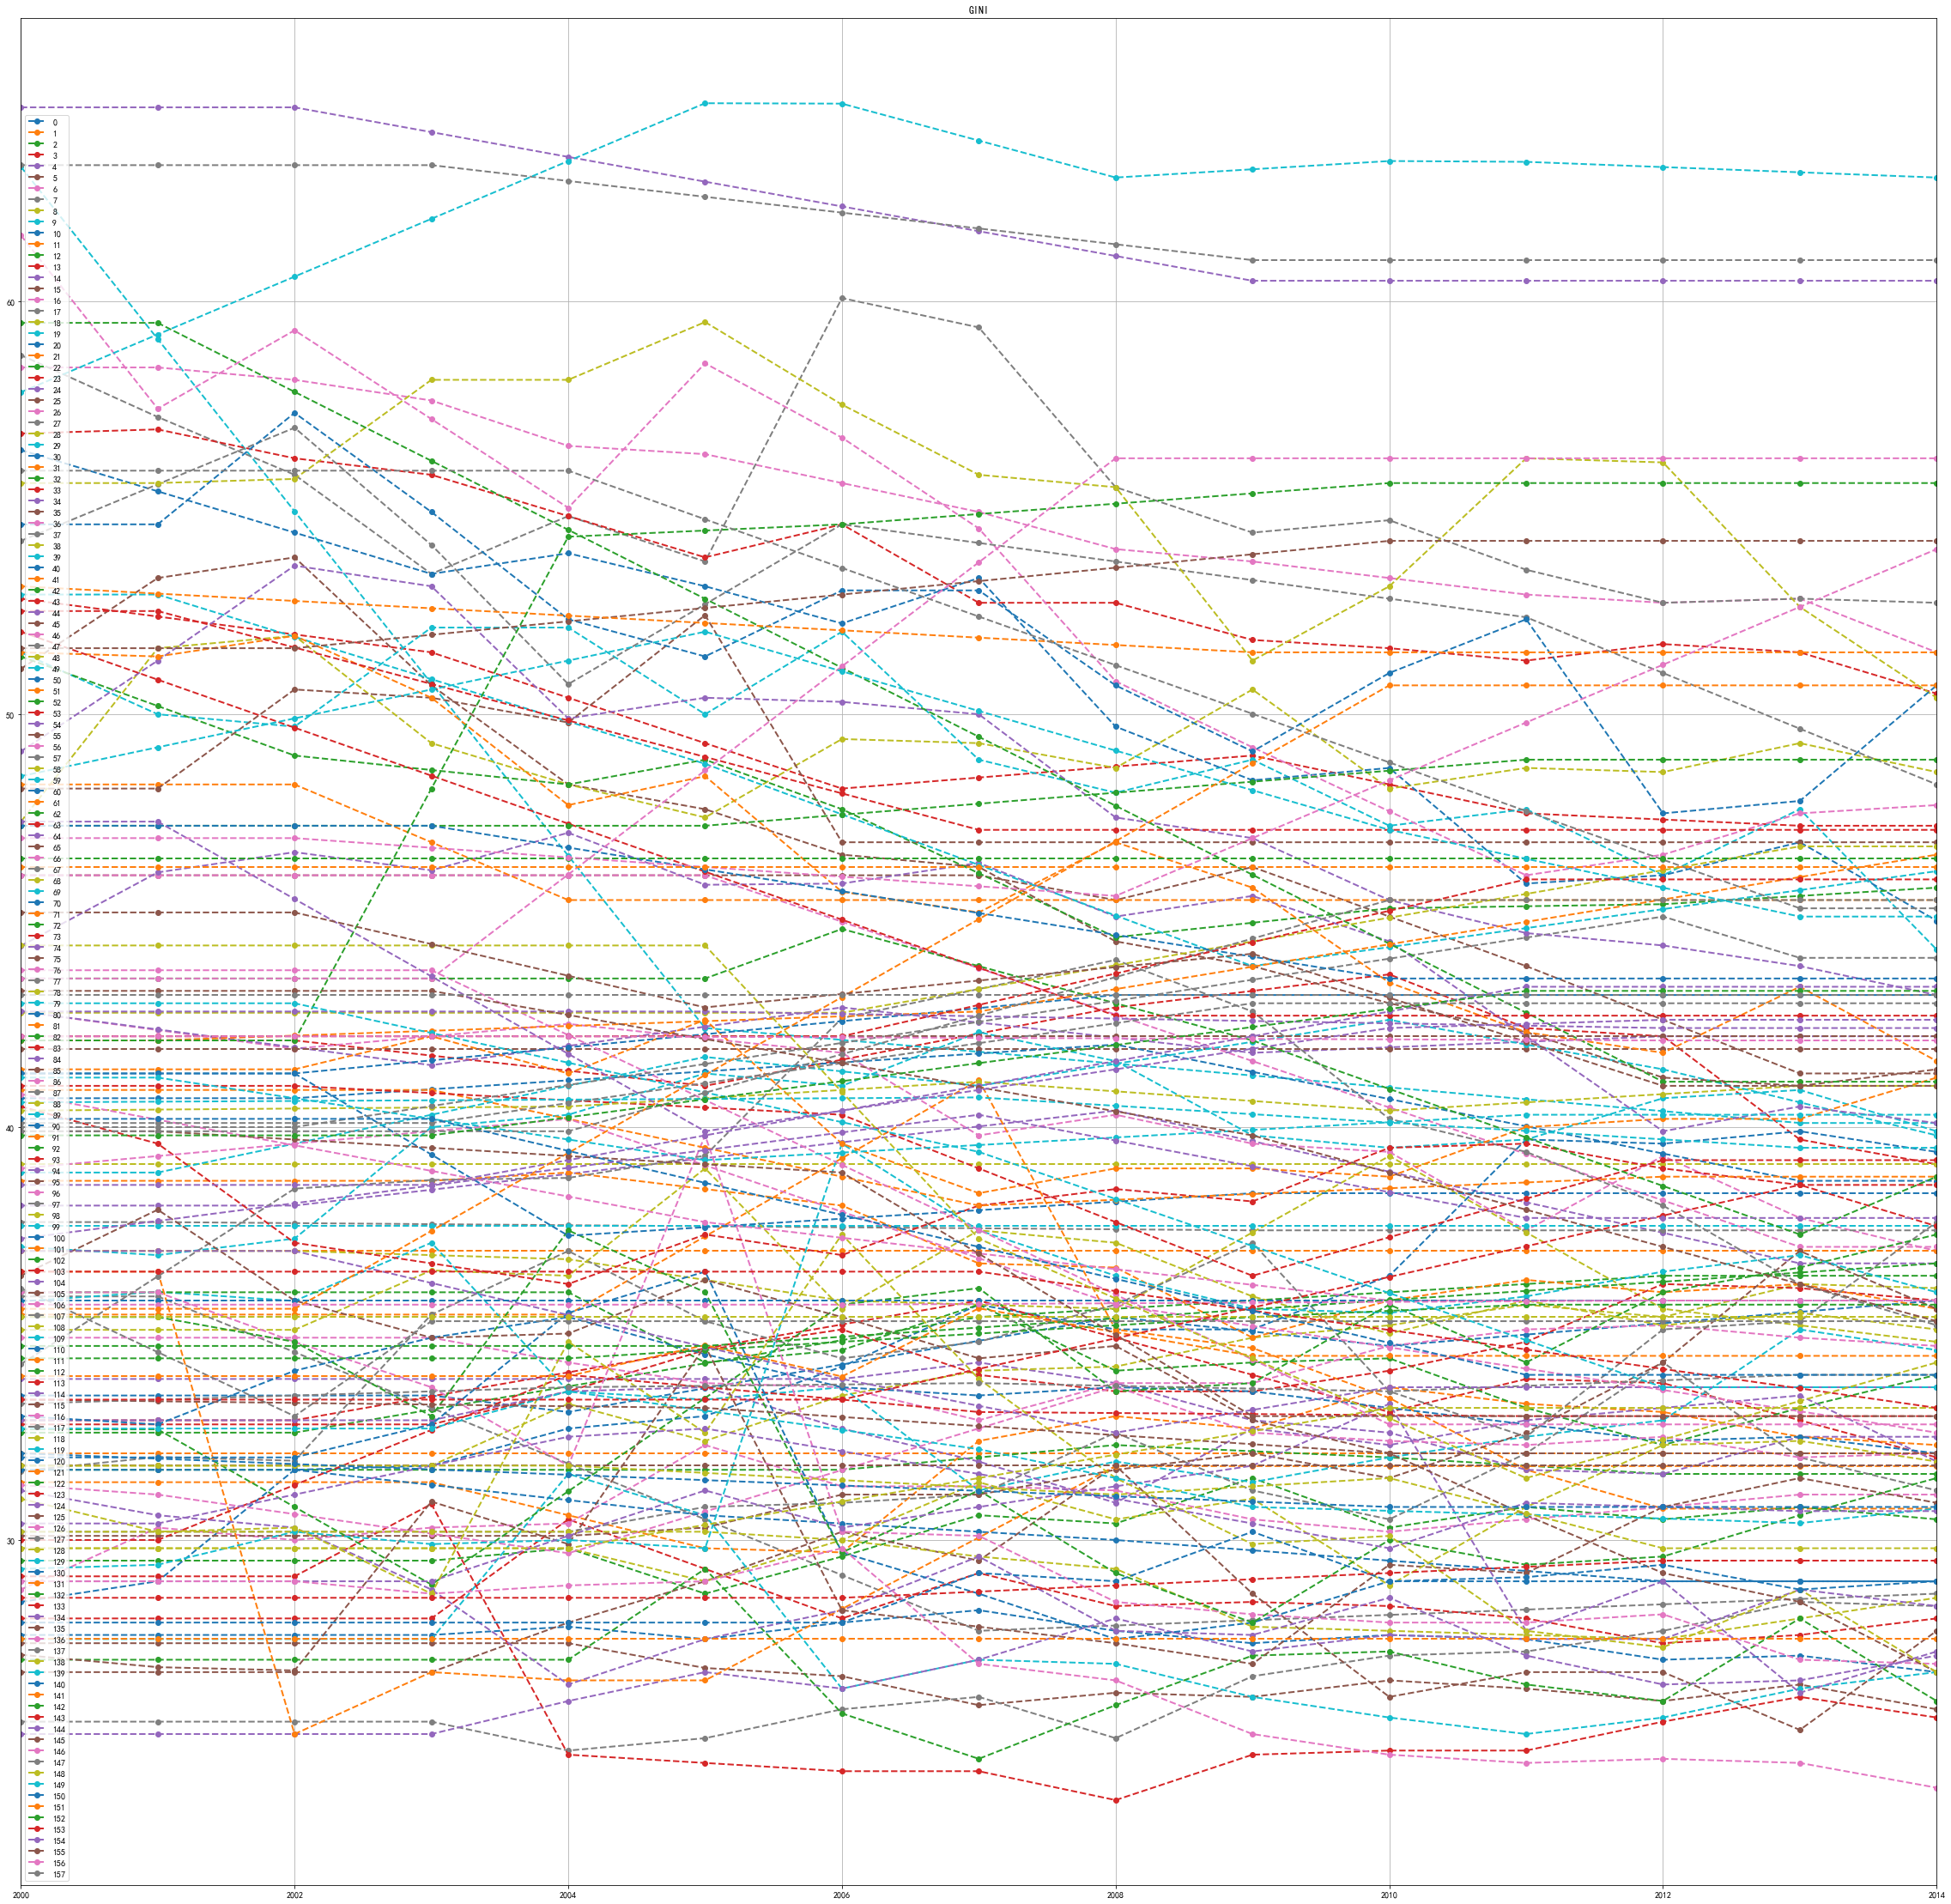

In [43]:
GINI.plot(title='GINI', LineWidth=2, marker='o', linestyle='dashed', grid=True, use_index=True, figsize=(40, 40))

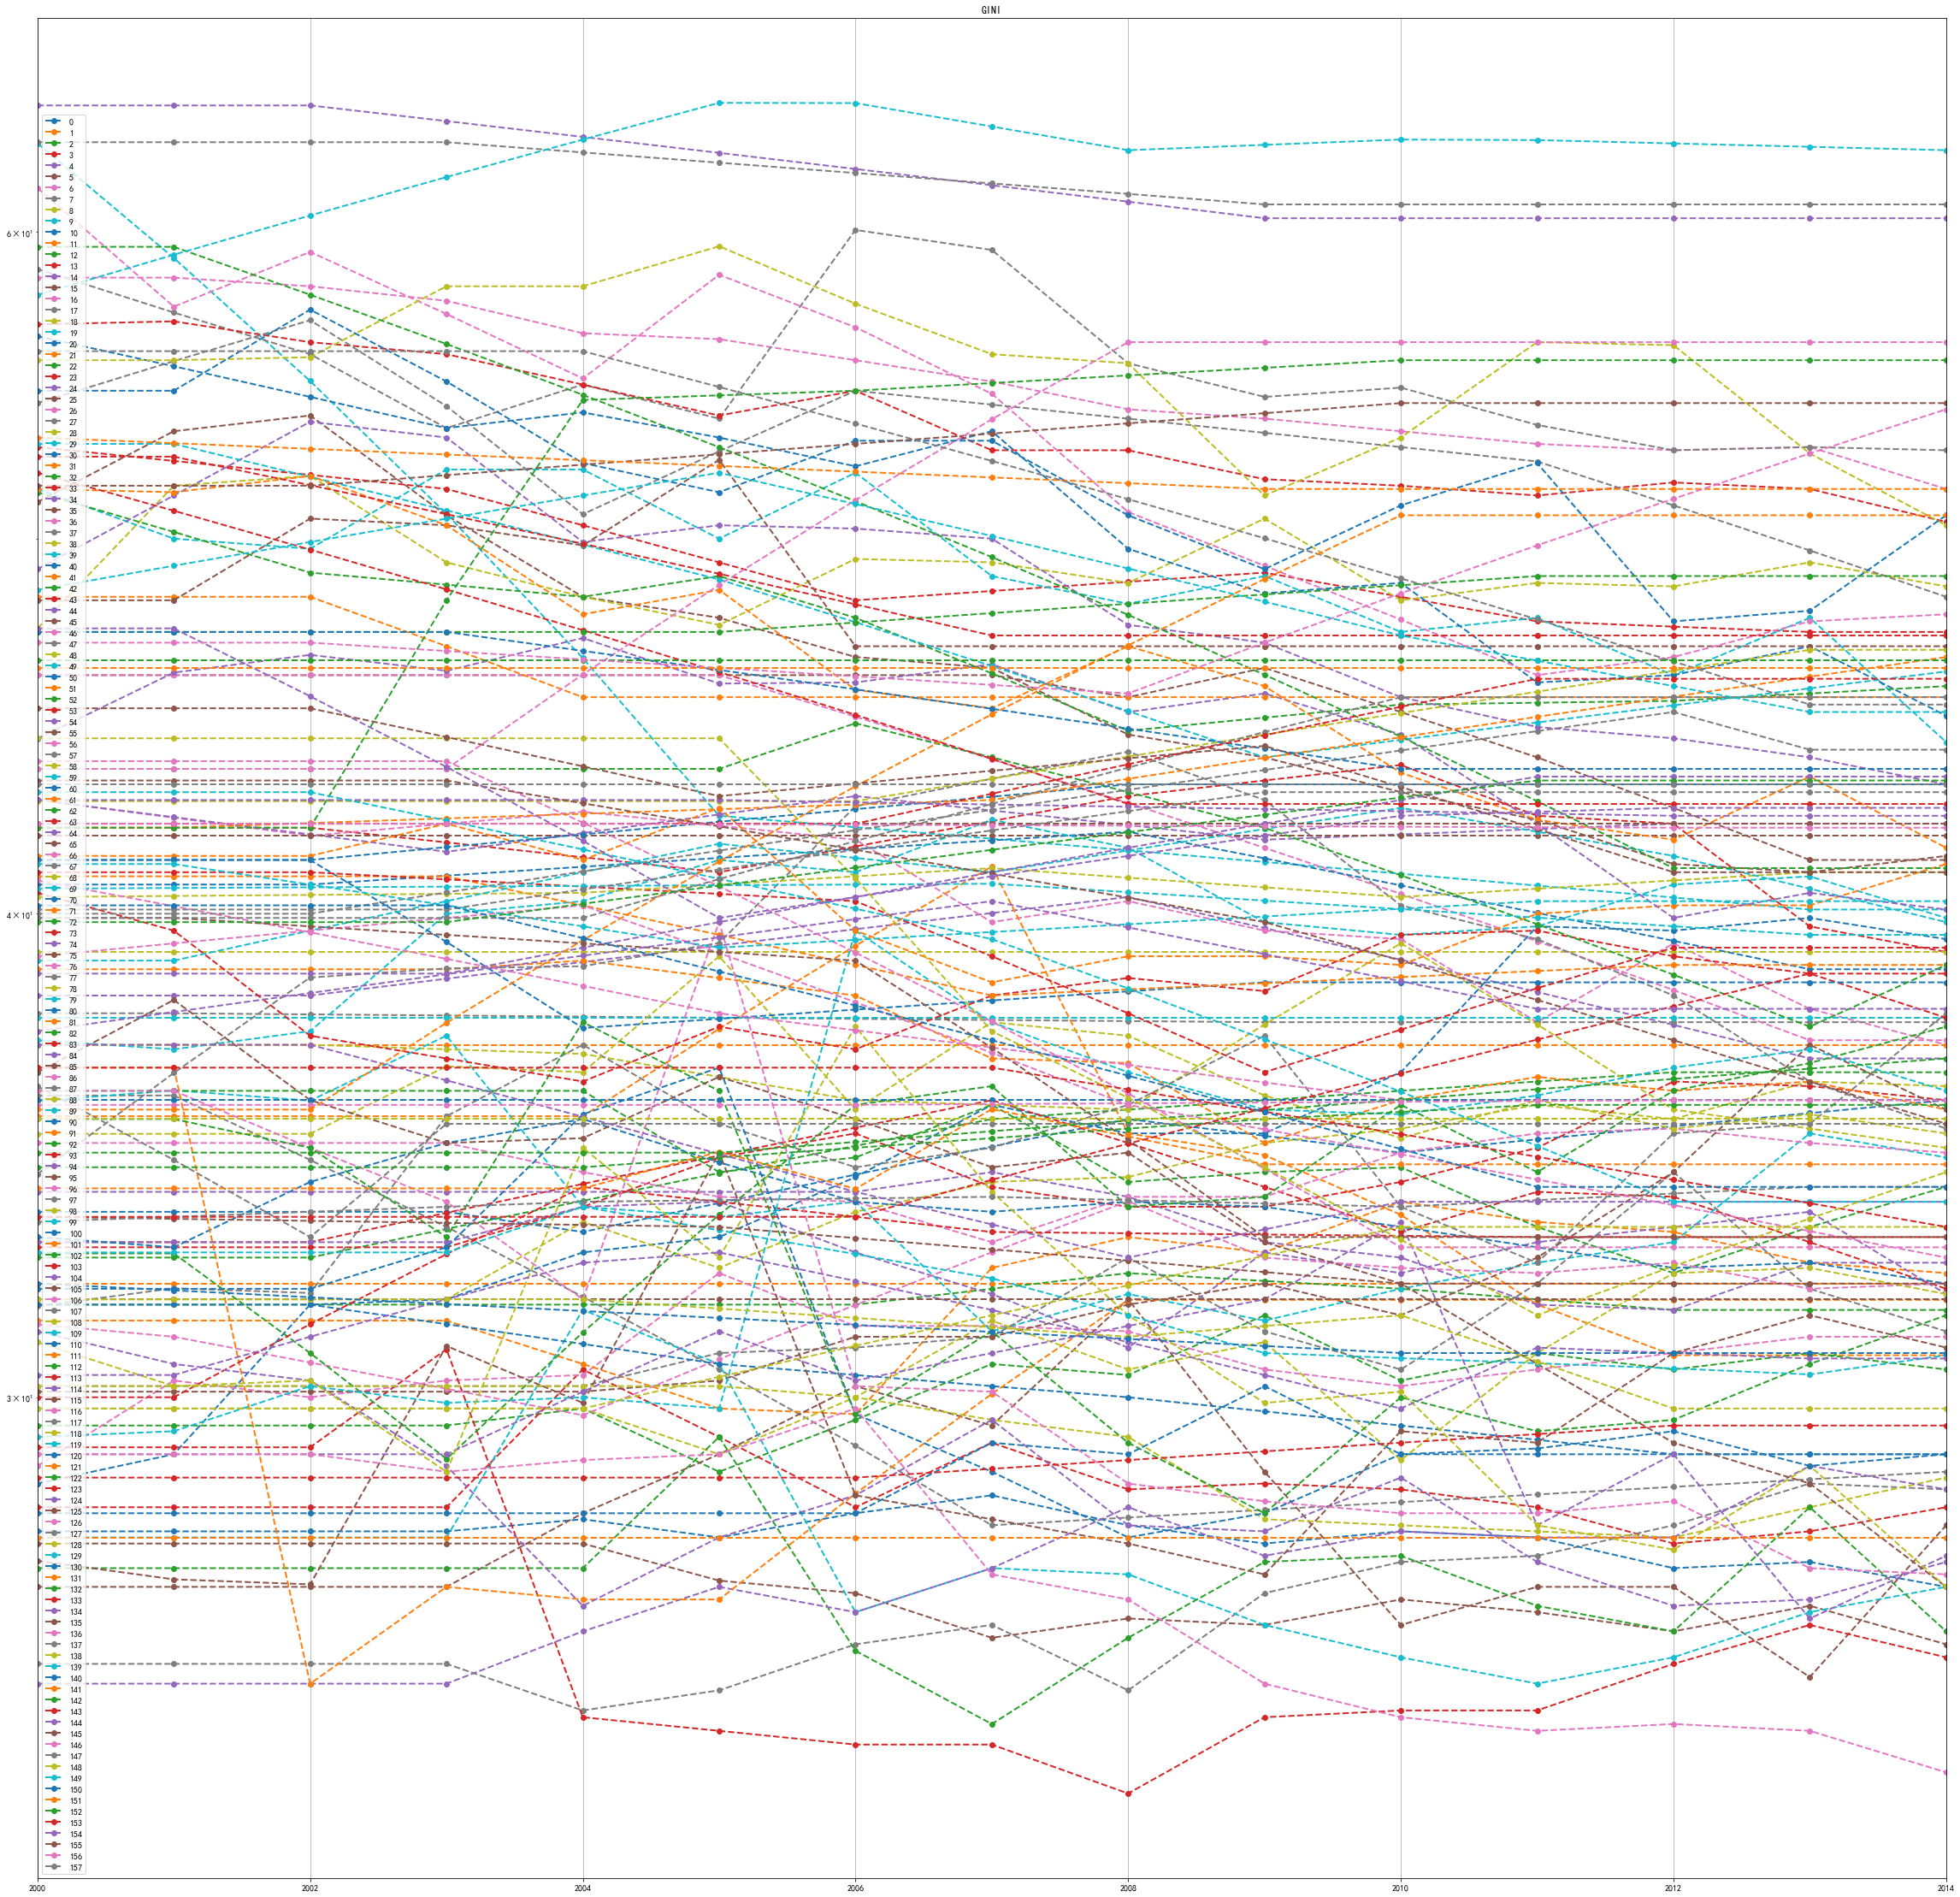

In [44]:
# 半对数折线图
GINI.plot(logy=True, title='GINI', LineWidth=2, marker='o', linestyle='dashed', grid=True, use_index=True, figsize=(40, 40))

#### （6）直方图和密度图

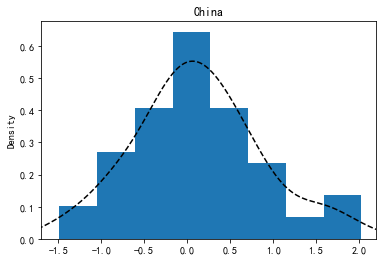

In [9]:
GINI_COV['中国'] .plot(kind='hist', density=True, bins=8, title='China')
GINI_COV['中国'] .plot(kind='kde', title='China', xlim=[-1.7, 2.2], style='k--')

#### （7）饼图

In [15]:
data = DataFrame([[230.1, 37.8, 69.2]], columns=['TV', 'Weibo', 'WeChat']).sum()
data

TV        230.1
Weibo      37.8
WeChat     69.2
dtype: float64

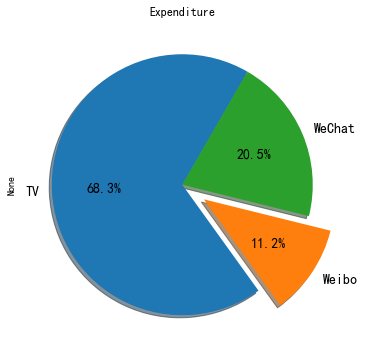

In [23]:
data.plot(kind='pie', figsize=(6, 6), title='Expenditure', fontsize=14, explode=[0, 0.2, 0], shadow=True, startangle=60, autopct='%1.1f%%')

#### （8）箱型图

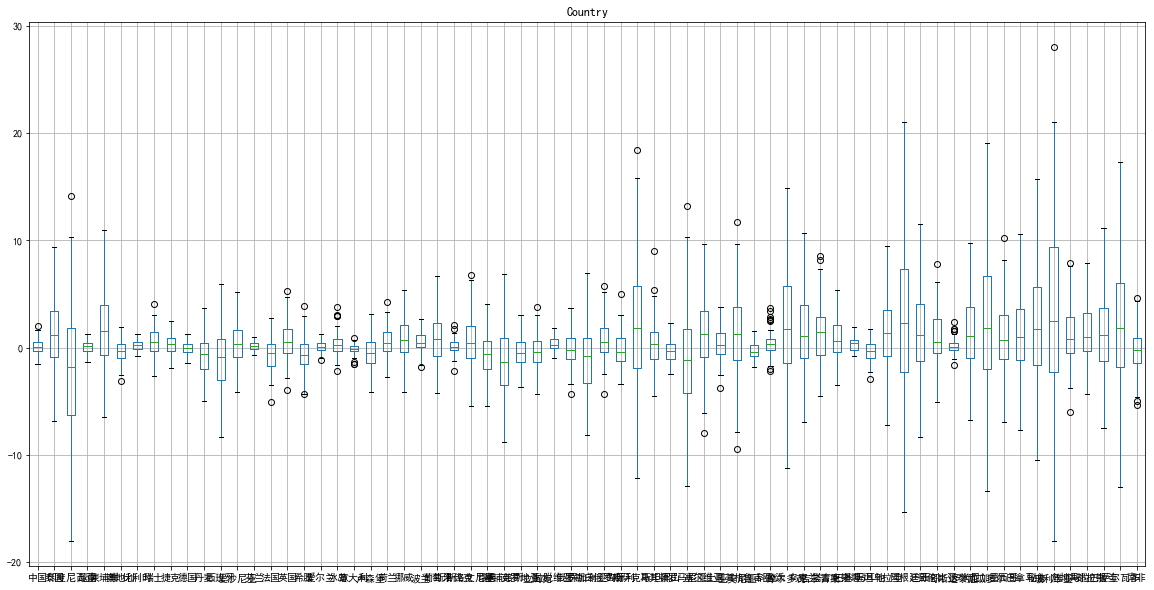

In [22]:
GINI_COV.plot(kind='box', figsize=(20, 10), title='Country', grid=True)